In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample #downsample the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV #to do cross validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA # to perform pca to plot the data

In [14]:
df=pd.read_excel('default of credit card clients.xls',header=1)
##here the second line contains column name so we skip the first line
##pandas automatically detects delimeters but we are using here it means separate by tab for this we can write sep='\t' after header
#to use from link
#df=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls',header=1)               
               

In [15]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [16]:
df.rename({'default payment next month':'DEFAULT'},axis=1,inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [17]:
df.drop('ID',axis=1,inplace=True)#here inplace means we don't want to create another dataset but want to modify in df only
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [18]:
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

In [19]:
df['SEX'].unique()

array([2, 1], dtype=int64)

In [21]:
df['EDUCATION'].unique()


array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [22]:
df['MARRIAGE'].unique() #here 0 means missing values

array([1, 2, 3, 0], dtype=int64)

In [23]:
len(df.loc[(df['EDUCATION']==0) | (df['MARRIAGE']==0)])

68

In [24]:
len(df)

30000

In [25]:
#here length missing value containing rows are only 1%dataset so we will remove it
df_no_missing=df.loc[(df['EDUCATION']!=0) & (df['MARRIAGE']!=0)]
len(df_no_missing)

29932

In [26]:
df_no_missing['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6], dtype=int64)

svm is great with dataset not so awesome with large dataset this dataset is not huge but it takes larger time to use CV 
So we will downsample both categories who did default and who didnot default to 1000 each

In [27]:
df_no_default=df_no_missing[df_no_missing['DEFAULT']==0]
df_default=df_no_missing[df_no_missing['DEFAULT']==1]


In [29]:
df_no_default_downsampled=resample(df_no_default,replace=False,n_samples=1000,random_state=42)
len(df_no_default_downsampled)

1000

In [30]:
df_default_downsampled=resample(df_default,replace=False,n_samples=1000,random_state=42)
len(df_default_downsampled)

1000

In [33]:
df_sample=pd.concat([df_no_default_downsampled,df_default_downsampled])
len(df_sample)

2000

In [35]:
X=df_sample.drop('DEFAULT',axis=1).copy()
Y=df_sample['DEFAULT'].copy()

In [39]:
X_encode=pd.get_dummies(X,columns=['SEX','MARRIAGE','EDUCATION','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])

In [41]:
X_encode.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,28,100143,50456,50000,0,0,0,2500,1000,...,0,1,0,0,0,0,0,0,0,0
4678,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,0,0,0,1,0,0,0,0,0,0
16004,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,0,0,0,1,0,0,0,0,0,0
22974,210000,32,355,975,410,0,0,0,979,412,...,0,1,0,0,0,0,0,0,0,0
17535,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,0,0,0,1,0,0,0,0,0,0


In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(X_encode,Y,random_state=42)
#we are scalling training and testing data separately to avoid data leakage
#it occurs when info about training dataset currepts or influence the testing dataset.
#here scale means each column should have mean value 0 and standard deviation 
#for RADIAL BASIS FUNCTION assumes that the data are scaled and centered.

In [44]:
X_train_scaled=scale(X_train)
X_test_scaled=scale(X_test)

In [48]:
svm=SVC(random_state=42)
svm.fit(X_train_scaled,Y_train)

SVC(random_state=42)

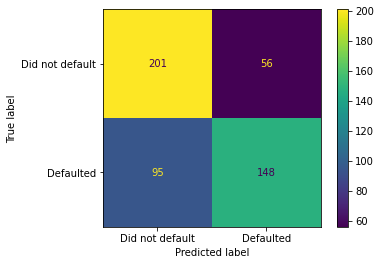

In [49]:
plot_confusion_matrix(svm,X_test_scaled,Y_test,values_format='d',display_labels=['Did not default','Defaulted'])

###Cross validation  with GridSearchCV()

#c parameter is regularisation parameter hyoerparameter testing
#higher the value C it will focus on correctly classifying points
#lower c will focus on margin 
#bcz error=C*classification error + margin error


In [50]:
param_grid=[{'C':[0.5,1,20,100] #values for c must be >0
            ,'gamma':['scale',1,0.1,0.001],
            'kernel':['rbf']}]

In [51]:
optimal_params= GridSearchCV(SVC(),param_grid,cv=5,scoring='accuracy',verbose=0)
                             #if you want seee what grid search is doing set verbose=2
                             

In [52]:
optimal_params.fit(X_train_scaled,Y_train)
print(optimal_params.best_params_)



{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


DRAW the final SVM and interpret

In [54]:
final_svm=SVC(random_state=42,C=100,gamma=0.001)
final_svm.fit(X_train_scaled,Y_train)


SVC(C=100, gamma=0.001, random_state=42)

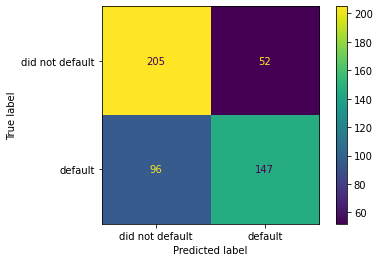

In [55]:
plot_confusion_matrix(final_svm,X_test_scaled,Y_test,values_format='d',display_labels=['did not default','default'])

#for ploting the data we have to use PCA

In [60]:
pca=PCA()#it centers the data but does not scales it
X_train_pca=pca.fit_transform(X_train_scaled)


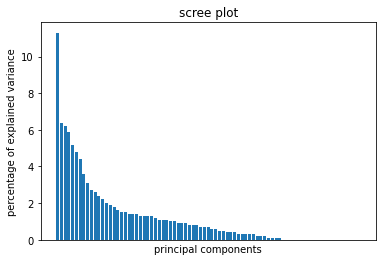

In [64]:
per_ver = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=[str(x) for x in range(1,len(per_ver)+1)]
plt.bar(x=range(1,len(per_ver)+1),height=per_ver)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.ylabel('percentage of explained variance')
plt.xlabel('principal components')
plt.title('scree plot')
plt.show()

In [66]:
#here plot is not so good for pca but we will take first tw columns as pca
train_pc1=X_train_pca[:,0]#x-coordinate
train_pc2=X_train_pca[:,1]#y-coordinate

#center and scale the pcs
pca_train=scale(np.column_stack((train_pc1,train_pc2)))

#now perform cv again and train svm on pca data
param_grid=[{'C':[0.5,1,20,100] #values for c must be >0
            ,'gamma':['scale',1,0.1,0.001],
            'kernel':['rbf']}]
optimal_params= GridSearchCV(SVC(),param_grid,cv=5,scoring='accuracy',verbose=0)
                             #if you want seee what grid search is doing set verbose=2


In [67]:
optimal_params.fit(pca_train,Y_train)
print(optimal_params.best_params_)


{'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}


In [73]:
final_svm=SVC(random_state=42,C=0.5,gamma=0.1)
final_svm.fit(pca_train,Y_train)


SVC(C=0.5, gamma=0.1, random_state=42)

In [74]:
#transform the test dataset with pca
X_test_pca=pca.transform(X_test_scaled)

In [79]:
test_pc1=X_test_pca[:,0]
test_pc2=X_test_pca[:,1]

#now we can create matrux of point to show
# the decision regions
# the matrix will be a little bit larger than transformedd pca so we can plot all of the PCA points on it without them being on the edge
x_min=test_pc1.min()-1
x_max=test_pc1.max()+1

y_min=test_pc2.min()-1
y_max=test_pc2.max()+1                    

In [83]:
xx ,yy= np.meshgrid(np.arange(start=x_min,stop=x_max,step=0.1),(np.arange(start=y_min,stop=y_max,step=0.1))

SyntaxError: unexpected EOF while parsing (<ipython-input-83-92b7102c2b14>, line 1)

AttributeError: 'Text' object has no attribute 'set_texts'

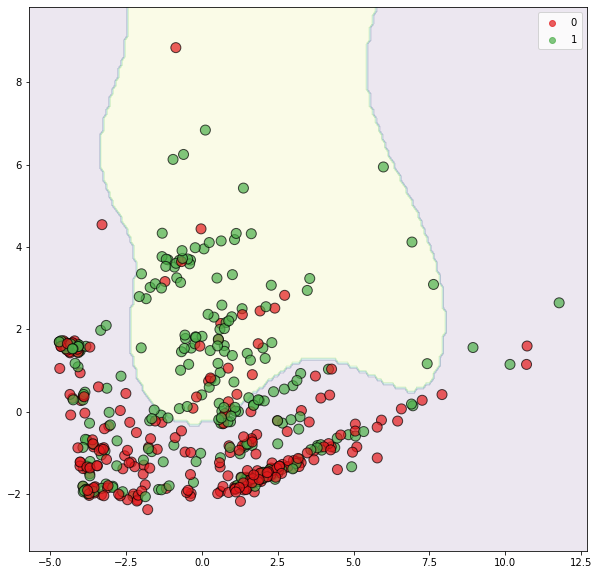

In [88]:
xx,yy=np.meshgrid(np.arange(start=x_min,stop=x_max,step=0.1),(np.arange(start=y_min,stop=y_max,step=0.1)))
#now we will classify every point in that matrix with the SVM,points on one side of classification boundry will get 0 other will get 1
Z= final_svm.predict(np.column_stack((xx.ravel(),yy.ravel()))) 
#now z is long array of 0s and 1s which reflect how each point is classified 
                    #we will use reshape so each classification coresponds to a specific point in matrix
Z = Z.reshape(xx.shape) 

fig,ax=plt.subplots(figsize=(10,10))
#now we will use contourf () to draw a filled contour plot using the matrix values and classification
#the contours will be filled according to the predicted classification 0s and 1s in Z
ax.contourf(xx,yy,Z,alpha=0.1)
#create custome colors for actual data points
cmap=colors.ListedColormap(['#e41a1c','#4daf4a'])
#now draw the actual data points they will be colord by their actual calassification(not predicted)
#setting alpha=0.7 let us see if we are covering a point
scatter=ax.scatter(test_pc1,test_pc2,c=Y_test,cmap=cmap,s=100,edgecolor='k',alpha=0.7)
#k means black
#create a legend
legend=ax.legend(scatter.legend_elements()[0],scatter.legend_elements()[1],loc="upper right")
legend.get_texts()[0].set_texts("no default")    
legend.get_texts()[1].set_texts(" default") 
#now add axis ,title
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decision surface using pca')
plt.show()